# Introduction to Data Science – Homework 7
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, March 6, 11:59pm.

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classification methods. 

## Your Data
First Name: Charlotte
<br>
Last Name: Riley-Vanwagoner
<br>

In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

The MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can apply the classification algorithms we studied on them.

Because both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
#X = digits.data
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like

print("===\nThe digit")
print(digits.target[0])

print("===\nThe raw data")
print(digits.images[0])

print("===\nThe scaled data")
print(X[0])

===
The digit
0
===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.757435

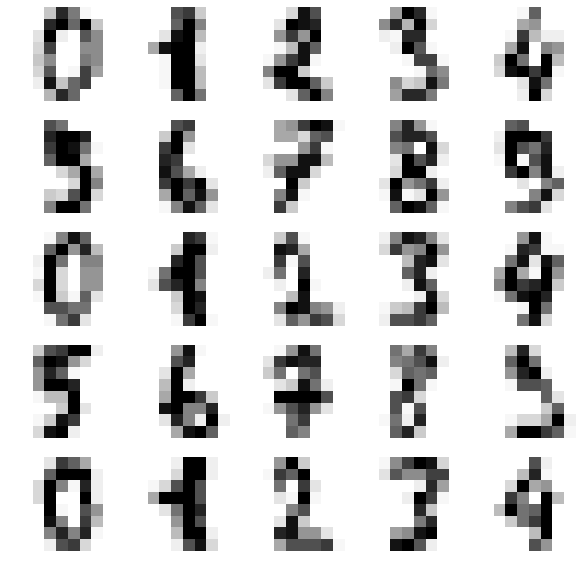

In [4]:
# plot a few of the images

plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(digits.images[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()


You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) to be generally helpful for this exercise. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
# Task 1.1 Question 1
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1, test_size=0.8)

In [6]:
# Task 1.1 Question 2
classSVM = svm.SVC(kernel='rbf',C=100,gamma='scale')
classSVM.fit(Xtrain, ytrain)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Task 1.1 Question 3
print('Confusion Matrix:')
prediction = classSVM.predict(Xtest)
print(metrics.confusion_matrix(y_true = ytest, y_pred = prediction))
print('Accuracy = ', metrics.accuracy_score(y_true = ytest, y_pred = prediction))
print()
print("The most common mistake that the classifier makes is mistaking the 4 digit as a 7 digit. The classifier made this \
mistake 13 times which is a lot higher than usual. If the classifer does a make a mistake, it's usually between 1-5 times.")

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   1   1   0   0   0   1 126   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Accuracy =  0.952712100139082

The most common mistake that the classifier makes is mistaking the 4 digit as a 7 digit. The classifier made this mistake 13 times which is a lot higher than usual. If the classifer does a make a mistake, it's usually between 1-5 times.


Predicted Number: 7
Actual Number: 9


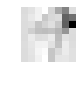

Predicted Number: 8
Actual Number: 2


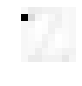

Predicted Number: 2
Actual Number: 1


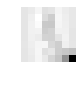

Predicted Number: 2
Actual Number: 8


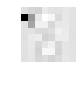

Predicted Number: 7
Actual Number: 4


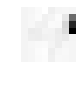

Predicted Number: 7
Actual Number: 3


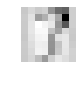

Predicted Number: 8
Actual Number: 1


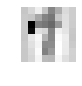

Predicted Number: 7
Actual Number: 8


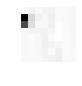

Predicted Number: 7
Actual Number: 4


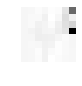

Predicted Number: 8
Actual Number: 3


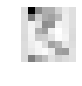

Predicted Number: 9
Actual Number: 7


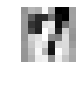

Predicted Number: 8
Actual Number: 2


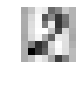

Predicted Number: 7
Actual Number: 2


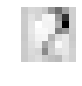

Predicted Number: 1
Actual Number: 8


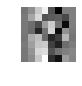

Predicted Number: 7
Actual Number: 9


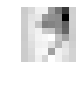

Predicted Number: 2
Actual Number: 1


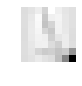

Predicted Number: 2
Actual Number: 3


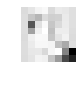

Predicted Number: 8
Actual Number: 5


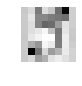

Predicted Number: 8
Actual Number: 3


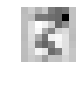

Predicted Number: 1
Actual Number: 8


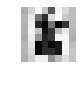

Predicted Number: 7
Actual Number: 1


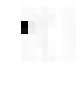

Predicted Number: 7
Actual Number: 4


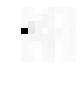

Predicted Number: 1
Actual Number: 8


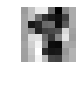

Predicted Number: 6
Actual Number: 9


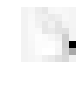

Predicted Number: 7
Actual Number: 4


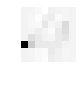

Predicted Number: 5
Actual Number: 9


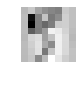

Predicted Number: 8
Actual Number: 9


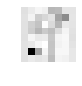

Predicted Number: 8
Actual Number: 1


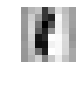

Predicted Number: 1
Actual Number: 9


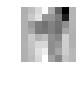

Predicted Number: 8
Actual Number: 3


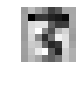

Predicted Number: 7
Actual Number: 3


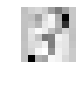

Predicted Number: 3
Actual Number: 9


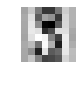

Predicted Number: 6
Actual Number: 5


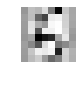

Predicted Number: 7
Actual Number: 4


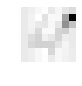

Predicted Number: 1
Actual Number: 9


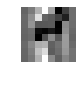

Predicted Number: 7
Actual Number: 2


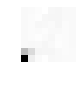

Predicted Number: 7
Actual Number: 4


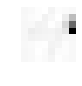

Predicted Number: 8
Actual Number: 2


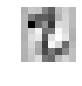

Predicted Number: 8
Actual Number: 2


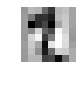

Predicted Number: 2
Actual Number: 3


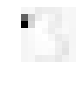

Predicted Number: 2
Actual Number: 1


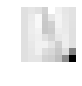

Predicted Number: 3
Actual Number: 9


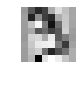

Predicted Number: 8
Actual Number: 1


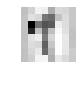

Predicted Number: 8
Actual Number: 2


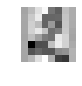

Predicted Number: 9
Actual Number: 5


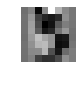

Predicted Number: 9
Actual Number: 5


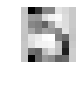

Predicted Number: 8
Actual Number: 1


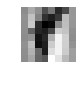

Predicted Number: 8
Actual Number: 6


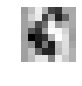

Predicted Number: 7
Actual Number: 4


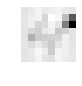

Predicted Number: 2
Actual Number: 3


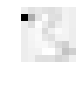

Predicted Number: 8
Actual Number: 9


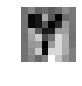

Predicted Number: 7
Actual Number: 3


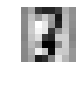

Predicted Number: 9
Actual Number: 5


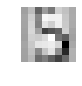

Predicted Number: 7
Actual Number: 4


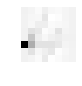

Predicted Number: 7
Actual Number: 4


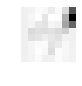

Predicted Number: 1
Actual Number: 2


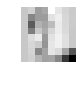

Predicted Number: 2
Actual Number: 1


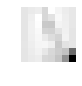

Predicted Number: 1
Actual Number: 6


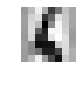

Predicted Number: 7
Actual Number: 4


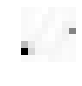

Predicted Number: 7
Actual Number: 4


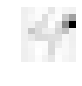

Predicted Number: 7
Actual Number: 4


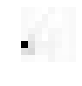

Predicted Number: 3
Actual Number: 8


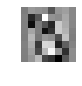

Predicted Number: 9
Actual Number: 5


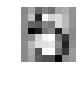

Predicted Number: 9
Actual Number: 3


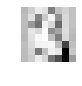

Predicted Number: 7
Actual Number: 4


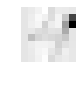

Predicted Number: 1
Actual Number: 8


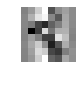

Predicted Number: 5
Actual Number: 9


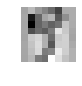

Predicted Number: 8
Actual Number: 3


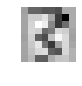

In [8]:
# Task 1.1 Question 4
index = 0
for n in ytest:
    if prediction[index] != n:
        plt.figure(figsize= (1, 1))
        plt.imshow(np.reshape(Xtest[index],(8,8)), cmap='Greys',interpolation='nearest')
        print("Predicted Number:", prediction[index])
        print("Actual Number:", n) 
        plt.axis('off')
        plt.show()
    index += 1

In [9]:
# Task 1.1 Question 5
bestC = None
best_average = 0
for rn in np.random.uniform(1,500,100):
    classSVM2 = svm.SVC(kernel='rbf', C = rn, gamma='scale')
    scores = cross_val_score(classSVM2, Xtrain, ytrain, cv = 5, scoring = 'accuracy')
    mean_scores = np.mean(scores)
    if mean_scores >= best_average:
        best_average = mean_scores
        bestC = rn 

print("Accuracy with Best C:", (mean_scores))
print("Best C:", bestC)
print("The best C value is between 5-500. The accuracy doesn't change between these numbers that much, if not at all.")

Accuracy with Best C: 0.9306253789186908
Best C: 5.735633259570292
The best C value is between 5-500. The accuracy doesn't change between these numbers that much, if not at all.


In [10]:
# Task 1.1 Question 6
new_X = digits.images
new_X = new_X.reshape(new_X.shape[0], -1)
Xtrain_us, Xtest_us, ytrain_us, ytest_us = train_test_split(new_X, y, random_state = 1, test_size=0.8)
for rn2 in np.random.uniform(1,500,100):
    classSVM3 = svm.SVC(kernel='rbf', C = rn2, gamma='scale')
    scores2 = cross_val_score(classSVM3, Xtest_us, ytest_us, cv = 5, scoring = 'accuracy')
    mean_scores2 = np.mean(scores2)

print("Accuracy:", (scores2.mean()))

Accuracy: 0.9854223371414355


Citations: https://stackoverflow.com/questions/54070437/valueerror-found-array-with-dim-3-estimator-expected-2


I used this StackOverflow post to reshape the digit data into a 2D array instead of 3D

**Your Interpretation**: 
In the orginal model with a parameter of C = 100, I fit the data and it had an accuracy of .95. The next model I tried to find the best C value, that ended up being a value between 5-500. There didn't seem to be much as difference after looking at the accuracy outputs. In this case, I would say going with a C = 100 is the better model. 

When I created a model for the unscaled data I had an accuracy of .985. That's pretty good and using the unscaled data created a better model than the scaled data. 

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 2, use k=10. In part 5, find the best value of k. 

In [11]:
# Task 1.2 Question 1
X_train_kk, X_test_kk, y_train_kk, y_test_kk = train_test_split(X, y, random_state = 1, test_size = .8) 

In [12]:
# Task 1.2 Question 2
kNN_classifier_digits = KNeighborsClassifier(n_neighbors = 10)
kNN_classifier_digits.fit(X_train_kk, y_train_kk)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [13]:
# Task 1.3 Question 3
kNN_prediction_digits = kNN_classifier_digits.predict(X_test_kk)
print(metrics.confusion_matrix(y_true = y_test_kk, y_pred = kNN_prediction_digits))
print("Accuracy:", metrics.accuracy_score(y_true = y_test_kk, y_pred = kNN_prediction_digits))
print("The classifier makes a lot of mistakes when classifying the letter 9. Pathetic.")

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy: 0.9123783031988874
The classifier makes a lot of mistakes when classifying the letter 9. Pathetic.


Predicted Number: 7
Actual Number: 9


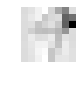

Predicted Number: 7
Actual Number: 9


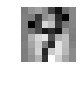

Predicted Number: 7
Actual Number: 3


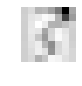

Predicted Number: 7
Actual Number: 9


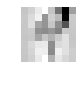

Predicted Number: 1
Actual Number: 2


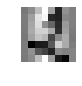

Predicted Number: 0
Actual Number: 2


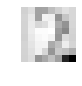

Predicted Number: 3
Actual Number: 8


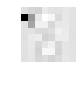

Predicted Number: 1
Actual Number: 8


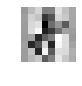

Predicted Number: 7
Actual Number: 4


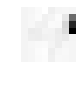

Predicted Number: 1
Actual Number: 9


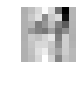

Predicted Number: 8
Actual Number: 3


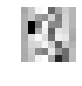

Predicted Number: 7
Actual Number: 3


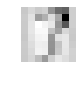

Predicted Number: 1
Actual Number: 9


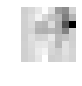

Predicted Number: 1
Actual Number: 5


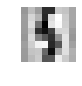

Predicted Number: 7
Actual Number: 9


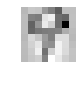

Predicted Number: 2
Actual Number: 8


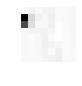

Predicted Number: 7
Actual Number: 9


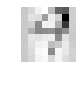

Predicted Number: 7
Actual Number: 4


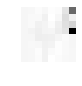

Predicted Number: 0
Actual Number: 9


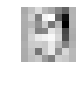

Predicted Number: 2
Actual Number: 1


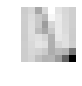

Predicted Number: 7
Actual Number: 9


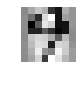

Predicted Number: 8
Actual Number: 2


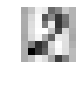

Predicted Number: 3
Actual Number: 2


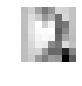

Predicted Number: 7
Actual Number: 2


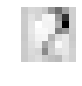

Predicted Number: 2
Actual Number: 1


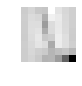

Predicted Number: 8
Actual Number: 3


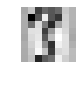

Predicted Number: 1
Actual Number: 8


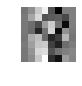

Predicted Number: 9
Actual Number: 3


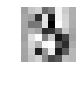

Predicted Number: 7
Actual Number: 9


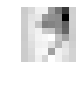

Predicted Number: 2
Actual Number: 1


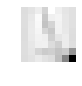

Predicted Number: 2
Actual Number: 3


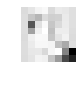

Predicted Number: 8
Actual Number: 2


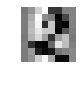

Predicted Number: 3
Actual Number: 5


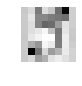

Predicted Number: 7
Actual Number: 2


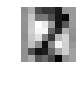

Predicted Number: 7
Actual Number: 3


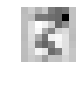

Predicted Number: 2
Actual Number: 1


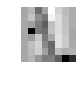

Predicted Number: 7
Actual Number: 3


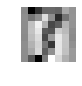

Predicted Number: 3
Actual Number: 9


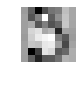

Predicted Number: 8
Actual Number: 1


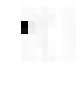

Predicted Number: 8
Actual Number: 2


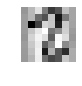

Predicted Number: 2
Actual Number: 1


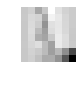

Predicted Number: 7
Actual Number: 9


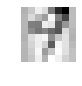

Predicted Number: 1
Actual Number: 8


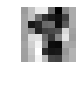

Predicted Number: 6
Actual Number: 9


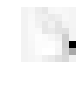

Predicted Number: 2
Actual Number: 1


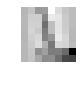

Predicted Number: 5
Actual Number: 9


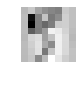

Predicted Number: 8
Actual Number: 9


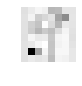

Predicted Number: 9
Actual Number: 5


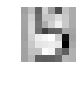

Predicted Number: 0
Actual Number: 3


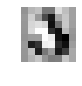

Predicted Number: 1
Actual Number: 9


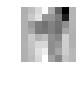

Predicted Number: 0
Actual Number: 9


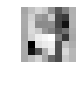

Predicted Number: 8
Actual Number: 2


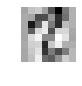

Predicted Number: 7
Actual Number: 3


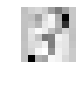

Predicted Number: 3
Actual Number: 9


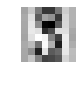

Predicted Number: 6
Actual Number: 5


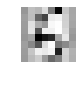

Predicted Number: 4
Actual Number: 5


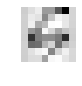

Predicted Number: 1
Actual Number: 6


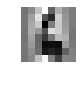

Predicted Number: 2
Actual Number: 1


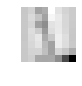

Predicted Number: 5
Actual Number: 9


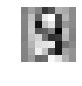

Predicted Number: 1
Actual Number: 8


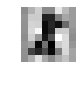

Predicted Number: 1
Actual Number: 9


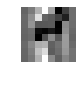

Predicted Number: 1
Actual Number: 9


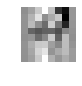

Predicted Number: 8
Actual Number: 2


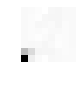

Predicted Number: 8
Actual Number: 7


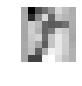

Predicted Number: 3
Actual Number: 8


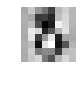

Predicted Number: 1
Actual Number: 2


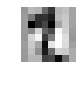

Predicted Number: 0
Actual Number: 9


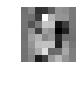

Predicted Number: 7
Actual Number: 4


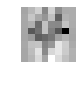

Predicted Number: 1
Actual Number: 9


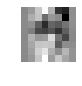

Predicted Number: 8
Actual Number: 9


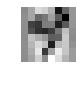

Predicted Number: 6
Actual Number: 9


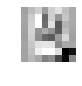

Predicted Number: 4
Actual Number: 9


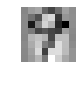

Predicted Number: 2
Actual Number: 1


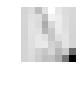

Predicted Number: 3
Actual Number: 9


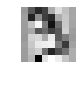

Predicted Number: 5
Actual Number: 3


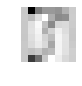

Predicted Number: 2
Actual Number: 1


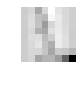

Predicted Number: 3
Actual Number: 8


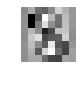

Predicted Number: 2
Actual Number: 1


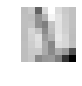

Predicted Number: 1
Actual Number: 8


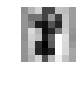

Predicted Number: 8
Actual Number: 9


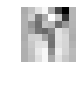

Predicted Number: 1
Actual Number: 2


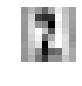

Predicted Number: 0
Actual Number: 9


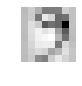

Predicted Number: 8
Actual Number: 2


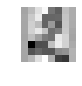

Predicted Number: 1
Actual Number: 8


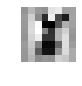

Predicted Number: 9
Actual Number: 5


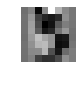

Predicted Number: 7
Actual Number: 8


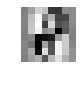

Predicted Number: 9
Actual Number: 5


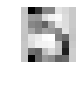

Predicted Number: 9
Actual Number: 5


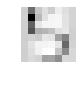

Predicted Number: 8
Actual Number: 2


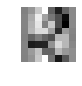

Predicted Number: 7
Actual Number: 9


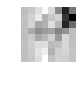

Predicted Number: 8
Actual Number: 2


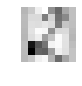

Predicted Number: 8
Actual Number: 6


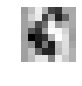

Predicted Number: 8
Actual Number: 9


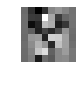

Predicted Number: 8
Actual Number: 9


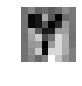

Predicted Number: 7
Actual Number: 3


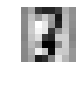

Predicted Number: 1
Actual Number: 9


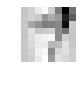

Predicted Number: 8
Actual Number: 9


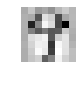

Predicted Number: 3
Actual Number: 9


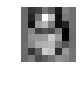

Predicted Number: 1
Actual Number: 8


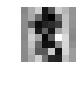

Predicted Number: 3
Actual Number: 5


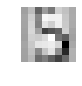

Predicted Number: 1
Actual Number: 2


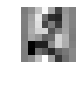

Predicted Number: 3
Actual Number: 8


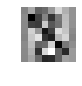

Predicted Number: 7
Actual Number: 4


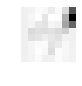

Predicted Number: 8
Actual Number: 2


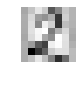

Predicted Number: 1
Actual Number: 9


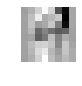

Predicted Number: 3
Actual Number: 9


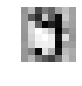

Predicted Number: 9
Actual Number: 8


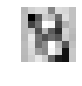

Predicted Number: 8
Actual Number: 3


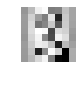

Predicted Number: 1
Actual Number: 9


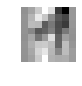

Predicted Number: 1
Actual Number: 6


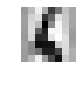

Predicted Number: 1
Actual Number: 9


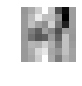

Predicted Number: 0
Actual Number: 2


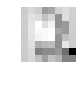

Predicted Number: 1
Actual Number: 8


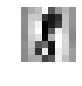

Predicted Number: 3
Actual Number: 8


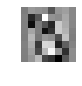

Predicted Number: 2
Actual Number: 1


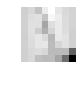

Predicted Number: 3
Actual Number: 2


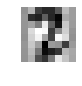

Predicted Number: 0
Actual Number: 5


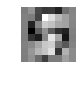

Predicted Number: 8
Actual Number: 3


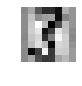

Predicted Number: 9
Actual Number: 5


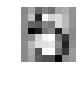

Predicted Number: 8
Actual Number: 9


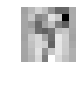

Predicted Number: 1
Actual Number: 8


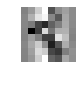

Predicted Number: 8
Actual Number: 9


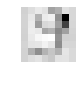

Predicted Number: 8
Actual Number: 4


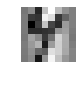

Predicted Number: 0
Actual Number: 9


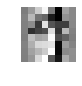

Predicted Number: 5
Actual Number: 9


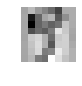

Predicted Number: 3
Actual Number: 8


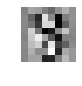

come back later


In [14]:
# Task 1.2 Question 4
i = 0 # Setting an index
for n in y_test_kk:
    if kNN_prediction_digits[i] != n:
        plt.figure(figsize= (1, 1))
        plt.imshow(np.reshape(X_test_kk[i],(8,8)), cmap='Greys',interpolation='nearest')
        print("Predicted Number:", kNN_prediction_digits[i])
        print("Actual Number:", n) 
        plt.axis('off')
        plt.show()
    i += 1
print("come back later")

In [15]:
X_train_kk.shape

(359, 64)

In [16]:
# Task 1.2 Question 5
bestk = None
highest_average = 0
for rn in np.random.randint(1,10,100): # Changed to 10
    kNN2 = KNeighborsClassifier(n_neighbors = rn)
    kk_scores = cross_val_score(kNN2, X_train_kk, y_train_kk, cv = 5, scoring = 'accuracy')
    average_scores = np.mean(kk_scores)
    if average_scores >= highest_average:
        highest_average = average_scores
        bestk = rn 

print("Best Accuracy:", highest_average, "with a k value of", bestk)

Best Accuracy: 0.9248938260235601 with a k value of 4


**Your Interpretation**: k-nearest neighbors had an accuracy of .90 when I first created the model and after tuning, I got an acccuracy of .92 with a k value of 4. With that being said, creating the model with the classifier k-nearest neighbors did not yield better results that SVM classifier. For this digit data set, I will stick with SVM since it's the better performing model. 


# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [1]:
# Task 2.1 Question 1

news_df = pd.read_csv("OnlineNewsPopularity.csv")
news_df.head()

NameError: name 'pd' is not defined

In [18]:
len(news_df)

39644

In [19]:
# Task 2.1 Question 2

predictor_df = news_df.drop(columns=['url', ' timedelta', ' shares']) # Need to remove these columns
predictor_df.head() # Checking to make sure I correctly dropped the columns
X = predictor_df.values
print("Predictor Variables:")
print(X)

Predictor Variables:
[[ 1.20000000e+01  2.19000000e+02  6.63594467e-01 ... -1.87500000e-01
   0.00000000e+00  1.87500000e-01]
 [ 9.00000000e+00  2.55000000e+02  6.04743081e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 9.00000000e+00  2.11000000e+02  5.75129531e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 ...
 [ 1.00000000e+01  4.42000000e+02  5.16355139e-01 ...  1.36363636e-01
   4.54545455e-02  1.36363636e-01]
 [ 6.00000000e+00  6.82000000e+02  5.39493293e-01 ...  0.00000000e+00
   5.00000000e-01  0.00000000e+00]
 [ 1.00000000e+01  1.57000000e+02  7.01986750e-01 ...  2.50000000e-01
   1.66666667e-01  2.50000000e-01]]


In [20]:
# Task 2.1 Question 3

shares_df = news_df[' shares']
shares_df.head() # Checking to make sure I made I have the correct data
shares = shares_df.values
print("Shares dateframe:", shares)
print()

np.median(shares) # The median number of shares is 1400
# 1 = popular, 0 = not popular
popularity = [] # This array is to just check if I stored the binary variables properly
y = [] # Initializing array
for random_number in shares:
    if random_number > 1400:
        #print('popular')
        popularity.append('popular')
        y.append(1) # Append to 1 when popular
    else:
        #print('not popular')
        y.append(0) # Append to 0 when not popular
        popularity.append('not popular')
print("Popular numpy array (will not be used):")
print(popularity[:10])
print()
print("Binary numpy array (will be used):")
print(y[:10])

Shares dateframe: [ 593  711 1500 ... 1900 1100 1300]

Popular numpy array (will not be used):
['not popular', 'not popular', 'popular', 'not popular', 'not popular', 'not popular', 'not popular', 'not popular', 'popular', 'not popular']

Binary numpy array (will be used):
[0, 0, 1, 0, 0, 0, 0, 0, 1, 0]


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [21]:
# Task 2.2 Question 1
print(np.min(y))
print(np.average(y))
print(np.max(y))
print()
print(np.min(shares))
print(np.median(shares))
print(np.max(shares))
print()
print("Looks reasonable")

0
0.4934416305115528
1

1
1400.0
843300

Looks reasonable


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [23]:
# Task 2.3 Question 1

X_train_neigh, X_test_neigh, y_train_neigh, y_test_neigh = train_test_split(X, y)
kNN_classifier = KNeighborsClassifier(n_neighbors = 5)
kNN_classifier.fit(X_train_neigh, y_train_neigh)
kNN_prediction = kNN_classifier.predict(X_test_neigh)
print(metrics.confusion_matrix(y_true = y_test_neigh, y_pred = kNN_prediction))
print("Accuracy:", metrics.accuracy_score(y_true = y_test_neigh, y_pred = kNN_prediction))

bestk = None
largest_average = 0
for rn in np.random.randint(1,10,10):
    kNN_classifier2 = KNeighborsClassifier(n_neighbors = rn)
    kNN_scores2 = cross_val_score(kNN_classifier2, X_train_neigh, y_train_neigh, cv = 3, scoring = 'accuracy')
    mean_scores2 = np.mean(kNN_scores2)
    if mean_scores2 >= largest_average:
        largest_average = mean_scores2
        bestk = rn 

print("Best Accuracy:", largest_average, "with a k value of", bestk)

[[2933 2092]
 [2261 2625]]
Accuracy: 0.5607910402582988
Best Accuracy: 0.5704436148387313 with a k value of 9


**Interpretation:** I started with an accuracy of .555. After tuning my n_neighbors parameter, I ended getting the best accuracy of .57. A slightly larger k-value yielded better results than a k = 5. 

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data.

*Hint:* SVM is more computationally expensive, so you might want to start by using only a fraction of the data, say 5,000 articles. It takes multiple minutes to run on the whole dataset.

In [29]:
# Task 2.4 Question 1

Xtrain_svm, Xtest_svm, ytrain_svm, ytest_svm = train_test_split(X, y)
SVM_classifier = svm.SVC(kernel='rbf', C= 1, gamma='scale')
SVM_classifier.fit(Xtrain_svm, ytrain_svm)
SVM_prediction = SVM_classifier.predict(Xtest_svm)
print(metrics.confusion_matrix(y_true = ytest_svm, y_pred = SVM_prediction))
print('Accuracy = ', metrics.accuracy_score(y_true = ytest_svm, y_pred = SVM_prediction))

bestC = None
best_average = 0
for rn in np.random.uniform(50,100,5):
    SVM_classifier2 = svm.SVC(kernel='rbf', C = rn, gamma='scale')
    SVM_scores2 = cross_val_score(SVM_classifier2, Xtrain_svm[:5000], ytrain_svm[:5000], cv = 3, scoring = 'accuracy')
    mean_scores = np.mean(SVM_scores2)
    if mean_scores >= best_average:
        best_average = mean_scores
        bestC = rn 

print("Accuracy with Best C:", (mean_scores))
print("Best C:", bestC)

[[2517 2585]
 [1541 3268]]
Accuracy =  0.583694884471799
Accuracy with Best C: 0.5628006598322782
Best C: 50.78240499937532


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [ ]:

decisionTree = tree.DecisionTreeClassifier(max_depth=3)

decisionTree = decisionTree.fit(XTrain, yTrain)


decisionTree = tree.DecisionTreeClassifier(min_samples_split=15)

decisionTree = decisionTree.fit(XTrain, yTrain)

In [28]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y)
tree_classifier = tree.DecisionTreeClassifier()
tree_classifier.fit(X_train_tree, y_train_tree)
tree_prediction = tree_classifier.predict(X_test_tree)
print(metrics.confusion_matrix(y_true = y_test_tree, y_pred = tree_prediction))
print("Accuracy:", metrics.accuracy_score(y_true = y_test_tree, y_pred = tree_prediction))

bestdepth = None
bestminsample = None
largest_average = 0
for _ in range(10):
    rn1 = np.random.randint(1, 20)
    rn2 = np.random.randint(1, 20)
    tree_classifier = tree.DecisionTreeClassifier(max_depth = rn1, min_samples_split = rn2)
    tree_scores = cross_val_score(tree_classifier, X_train_tree, y_train_tree, cv = 3, scoring = 'accuracy')
    mean_scores = np.mean(tree_scores)
    if mean_scores2 >= largest_average:
        largest_average = mean_scores
        bestdepth = rn1
        bestminsample = rn2

print("Best Accuracy:", largest_average, "with a depth value of", bestdepth, "and a min sample of", bestminsample)

[[2926 2154]
 [2030 2801]]
Accuracy: 0.5778428009282616
Best Accuracy: 0.629636480056616 with a depth value of 7 and a min sample of 6


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+  Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** 
1. Before tuning the parameters, all methods had an accuracy of around 55%. However, the Decision Tree classifier worked the best because after tuning, the accuracy increased more than the other classifiers. I would say that the Decision Tree worked the best. 
2. Tuning the k, C, max depth, and min sample parameters increased accuracy. However, parameters can be tuned in a way that actually decreases accuracy so its important to be careful. Parameters can both increase and decrease accuracy, depending on their usage. 
3. In my opinion, the decision tree model is the easiest to interpret because the methodology is more straightforward and intuitive. 
4. After adjusting the parameters, I would interpret my results as okay. The classifier isn't incredibly accuracate but it is greater than 50% so that's nice. 